# Naive-Bayes model using text data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [2]:
#import data

%store -r x_text_train_tf
%store -r x_text_test_tf
%store -r y_text_train_tf
%store -r y_text_test_tf


In [3]:
#rename variables for ease of use

x_train = x_text_train_tf
x_test = x_text_test_tf
y_train = y_text_train_tf
y_test = y_text_test_tf

In [4]:
#define model

mnb = MultinomialNB()

In [5]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [6]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [7]:
#cross validate on training set to check model stability

cv_scores_tfidf_text_mnb = cross_validate(mnb, x_train, y_train, cv = k_folds, scoring=scorer)

In [8]:
#check cross validation scores

cv_scores_tfidf_text_mnb

{'fit_time': array([0.07380319, 0.06083751, 0.05784488, 0.05983973, 0.0588448 ]),
 'score_time': array([0.02194238, 0.02197242, 0.01792026, 0.0179522 , 0.0179522 ]),
 'test_accuracy': array([0.85569651, 0.8570383 , 0.85799683, 0.8559229 , 0.84518726]),
 'test_precision': array([0.84408004, 0.84      , 0.84426458, 0.84291609, 0.82107574]),
 'test_recall': array([0.8300082 , 0.83535912, 0.83310383, 0.83396843, 0.82903851]),
 'test_f1_score': array([0.83698498, 0.83767313, 0.83864708, 0.83841839, 0.82503792])}

In [9]:
#fit model on the whole training set
start = process_time()

mnb.fit(x_train, y_train)

end=process_time()

In [10]:
#test model on test set

y_pred = mnb.predict(x_test)

In [11]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9704
           1       0.84      0.83      0.83      7863

    accuracy                           0.85     17567
   macro avg       0.85      0.85      0.85     17567
weighted avg       0.85      0.85      0.85     17567



In [12]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Multinomial Naive Bayes model with Text Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

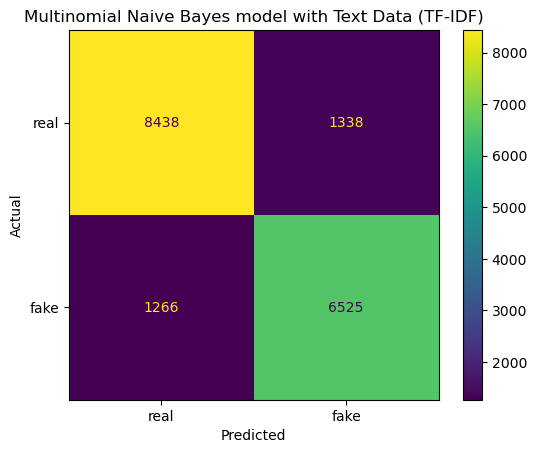

In [13]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Multinomial Naive Bayes model with Text Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [14]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [15]:
dict = {'data type': 'text',
        'model type':'multinomial Naive-Bayes',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [16]:
tfidf_text_mnb=pd.DataFrame.from_dict([dict])

In [17]:
tfidf_text_mnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,multinomial Naive-Bayes,TF-IDF,0.851768,0.829836,0.837505,0.833653,0.03125


In [18]:
#save results for later use

%store tfidf_text_mnb

Stored 'tfidf_text_mnb' (DataFrame)
